In [1]:
import sklearn 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib 
%matplotlib inline

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
data_set = pd.read_csv ('suv_data.csv')

In [4]:
data_set.head ()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data_set.shape

(400, 5)

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data_set.groupby ('Purchased').size()

Purchased
0    257
1    143
dtype: int64

In [8]:
cleaned_data_set = data_set.drop (columns = ['User ID'], axis = '1')
cleaned_data_set.head ()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
cleaned_data_set.describe ()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Visualizing data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

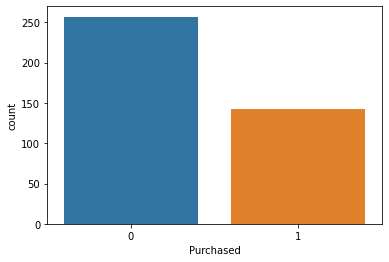

In [10]:
sb.countplot (x = 'Purchased', data = cleaned_data_set)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

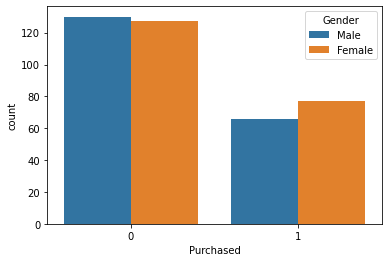

In [11]:
sb.countplot (x = 'Purchased', hue = 'Gender', data = cleaned_data_set)

<AxesSubplot:>

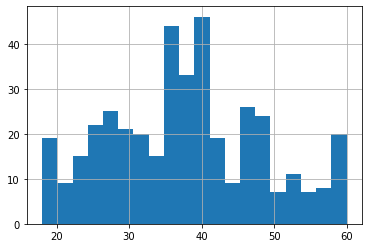

In [12]:
data_set ['Age'].hist(bins = 20)

In [13]:
# Dividing Age into categories

age_category = []

for i in range (0, len (data_set ['Age'])):
    if cleaned_data_set ['Age'][i] <= 20:
        age_category.append ('A');
        
    elif 20 < cleaned_data_set ['Age'][i] <= 30:
        age_category.append ('B');
        
    elif 30 < cleaned_data_set ['Age'][i] <= 40:
        age_category.append ('C');
    
    elif 40 < cleaned_data_set ['Age'][i] <= 50:
        age_category.append ('D');
        
    else:
        age_category.append ('E');

        
age_data_frame = pd.DataFrame (data = age_category, columns = ['AgeCategory'])    # converting list into data frame

augmented_data_set = pd.concat([cleaned_data_set, age_data_frame], axis = 1)        # concatenating data set with data frame
augmented_data_set.head(10)

,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,Male,19,19000,0,A
1,Male,35,20000,0,C
2,Female,26,43000,0,B
3,Female,27,57000,0,B
4,Male,19,76000,0,A
5,Male,27,58000,0,B
6,Female,27,84000,0,B
7,Female,32,150000,1,C
8,Male,25,33000,0,B
9,Female,35,65000,0,C


<AxesSubplot:xlabel='Purchased', ylabel='count'>

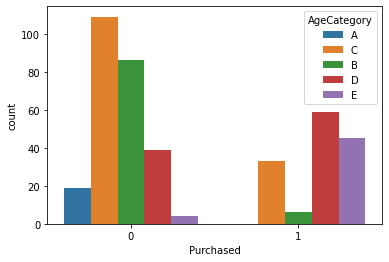

In [14]:
sb.countplot ( x = 'Purchased', hue = 'AgeCategory', data = augmented_data_set)

<AxesSubplot:>

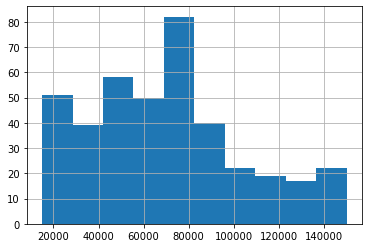

In [15]:
data_set ['EstimatedSalary'].hist(bins=10)

In [16]:
# Dividing income into categories

income_category = []

for i in range (0, len  (data_set ['EstimatedSalary'])):
    if cleaned_data_set ['EstimatedSalary'][i] <= 25000:
        income_category.append ('Very Low');
        
    elif 25000 < cleaned_data_set ['EstimatedSalary'][i] <= 50000:
        income_category.append ('Low');
        
    elif 50000 < cleaned_data_set ['EstimatedSalary'][i] <= 75000:
        income_category.append ('Medium');
        
    elif 75000 < cleaned_data_set ['EstimatedSalary'][i] <= 100000:
        income_category.append ('High');
        
    elif 100000 < cleaned_data_set ['EstimatedSalary'][i] <= 125000:
        income_category.append ('Very High');
        
    else:
        income_category.append ('Extremely High');

        
income_data_frame = pd.DataFrame (data = income_category, columns = ['IncomeCategory'])

augmented_data_set_2 = pd.concat([augmented_data_set, income_data_frame], axis = 1)
augmented_data_set_2.head(10)

,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory
0,Male,19,19000,0,A,Very Low
1,Male,35,20000,0,C,Very Low
2,Female,26,43000,0,B,Low
3,Female,27,57000,0,B,Medium
4,Male,19,76000,0,A,High
5,Male,27,58000,0,B,Medium
6,Female,27,84000,0,B,High
7,Female,32,150000,1,C,Extremely High
8,Male,25,33000,0,B,Low
9,Female,35,65000,0,C,Medium


<AxesSubplot:xlabel='Purchased', ylabel='count'>

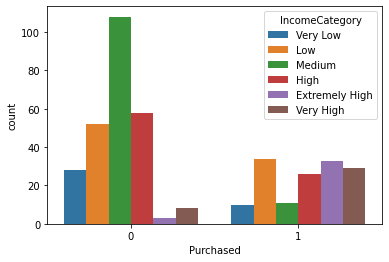

In [17]:
sb.countplot ( x = 'Purchased', hue = 'IncomeCategory', data = augmented_data_set_2)

In [18]:
binary_gender = pd.get_dummies (augmented_data_set_2 ['Gender'],drop_first = True)
binary_gender.head ()

,Male
0,1
1,1
2,0
3,0
4,1


In [19]:
binary_age = pd.get_dummies (augmented_data_set_2 ['AgeCategory'])
binary_age.head ()

,A,B,C,D,E
0,1,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [20]:
binary_income = pd.get_dummies (augmented_data_set_2 ['IncomeCategory'])
binary_income.head ()

,Extremely High,High,Low,Medium,Very High,Very Low
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0


In [21]:
final_data_set  = pd.concat ([augmented_data_set_2, binary_age, binary_gender, binary_income], axis = 1)

final_data_set_1 = final_data_set.drop (columns = ['Age', 'Gender', 'EstimatedSalary', 'IncomeCategory', 'AgeCategory'], axis = 1)
final_data_set_1.head ()

,Purchased,A,B,C,D,E,Male,Extremely High,High,Low,Medium,Very High,Very Low
0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0,1,0,0,0,0


# Modelling Data

# Based on all features

In [22]:
Y = final_data_set_1 ['Purchased']
X = final_data_set_1.drop (columns = ['Purchased'], axis = 1)

In [25]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = 0.3, random_state = 0)

In [26]:
scaler = StandardScaler ()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
model = LogisticRegression (solver = 'liblinear')

model.fit (X_train, Y_train)

LogisticRegression(solver='liblinear')

In [28]:
predictions = model.predict (X_test)

In [29]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        79
           1       0.84      0.88      0.86        41

    accuracy                           0.90       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120



In [30]:
print (confusion_matrix (Y_test, predictions))

[[72  7]
 [ 5 36]]


In [31]:
accuracy_score (Y_test, predictions)

0.9

# Based on some features

In [32]:
Y = final_data_set_1 ['Purchased']
X = final_data_set_1.drop (columns = ['Purchased', 'Male'], axis = 1)

In [33]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = 0.3, random_state = 0)

In [34]:
scaler = StandardScaler ()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
model = LogisticRegression (solver = 'liblinear')

model.fit (X_train, Y_train)

LogisticRegression(solver='liblinear')

In [36]:
predictions = model.predict (X_test)

In [37]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        79
           1       0.83      0.85      0.84        41

    accuracy                           0.89       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.89      0.89      0.89       120



In [38]:
accuracy_score (Y_test, predictions)

0.8916666666666667